### 对波士顿房屋价格进行预测

In [110]:
import pandas as pd

# 加载数据
path = './datas/boston_housing.data'
data = pd.read_csv(path, sep='\s+', header=None)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [111]:
# 数据预处理

In [112]:
# 获取特征属性X和目标属性Y
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [113]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.3, random_state=26)

In [114]:
# 特征工程 多项式拓展升维，提高模型复杂度和拟合程度
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
xTrain = poly.fit_transform(xTrain)
xTest = poly.transform(xTest)

In [115]:
# 构建模型
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
linear = LinearRegression(fit_intercept=True) # 需要截距项
# lasso = Lasso(alpha=1000, fit_intercept=True)

In [116]:
# 模型训练
linear.fit(xTrain, yTrain)
print(linear.score(xTrain, yTrain))
print(linear.score(xTest, yTest))

0.9283605211556214
0.8138964783256315


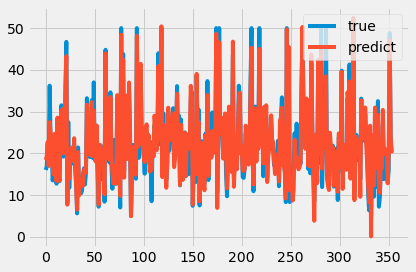

In [117]:
# 可视化数据
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

y_train_Predict = linear.predict(xTrain)

plt.plot(range(len(xTrain)), yTrain, label='true')
plt.plot(range(len(xTrain)), y_train_Predict, label='predict')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

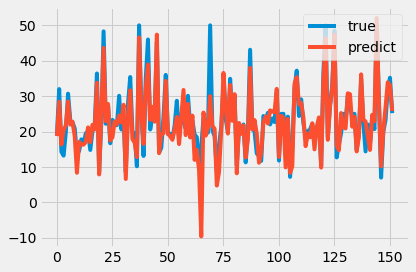

In [118]:
y_test_Predict = linear.predict(xTest)

plt.plot(range(len(xTest)), yTest, label='true')
plt.plot(range(len(xTest)), y_test_Predict, label='predict')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()